<a href="https://colab.research.google.com/github/jchou03/Natural-Language-Processing/blob/main/PA4_Jared_Chou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment 4: 

**The data files are zipped and uploaded in Piazza "Resources"->"Homeworks"->pa4.zip .**

**Part 1: Twitter Sentiment Classification with sklearn**

The file: sentiment-train.csv contains 60k tweets annotated by their sentiments (0: negative, 1: positive), which is a sample
of a very large sentiment corpus that has been weakly annotated based on the emojis contained in the tweets. File sentiment-test.csv contains the testing data organized in the same format as the training data file.

**Task 1 & 2:**
Using [sklearn](https://scikit-learn.org/stable/index.html) (you should search for the relevant functions to see how to use them in your code), 

1. Train a Multinomial Naive Bayes classifier (with default parameters) to predict sentiment on the
training data, featurizing the data using CountVectorizer (also in sklearn). Use the default parameters of CountVectorizer
and max features = 1000 (to limit the number of bag-of-word features to only the top 1k words based on frequency across
the corpus) and also ignores stop words. You should learn more about CountVectorizer parameters and usage [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Report the accuracy of the trained
classifier on the test set. 

2. Use CountVectorizer with binary counts (set binary flag = True), with other parameters same as before. Using
these features, train MultinomialNB classifier with default parameters and report the accuracy of the trained classifier
on the test set. Does using binary counts as features improve the classification accuracy?

**Hint:** we strongly recommend using [Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) for reading .csv files and manipulating them in this assignment. 

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

def loadDataFromCSV(filePath):
  df = pd.read_csv(filePath)
  y = df['sentiment']
  x = df['text']
  return df,x,y
# Load the csv data
df,xTrain,yTrain = loadDataFromCSV('sentiment-train.csv')
_,xTest,yTest = loadDataFromCSV('sentiment-test.csv')

# Train a Multinomial Naive Bayes classifier on sentiment-train.csv
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df.text)
# CountVectorizer(input=df, max_features=1000)

# print(vectorizer.vocabulary_)

# print(X.toarray())
# useful functions: transform, fit, 

# steps:
# load data from csv
# construct toekn count matrix (countvectorizer)
def constructCountMatrix(corpus, target):
  vectorizer = CountVectorizer(max_features=1000, stop_words='english')
  vectorizer.fit(corpus) # create a count matrix with the vocabulary of the corpus (each column)
  countMat = vectorizer.transform(target) # apply the documents in target into the count matrix, 
  return countMat

xTrainCountMat = constructCountMatrix(xTrain, xTrain)
xTestCountMat = constructCountMatrix(xTrain, xTest)
# print(xTrainCountMat.toarray())
# train mnb model with count matrix
def trainMultiNB(x,y):
  clf = MultinomialNB()
  clf.fit(x, y)
  return clf

mnb = trainMultiNB(xTrainCountMat, yTrain)

# test model & compute accuracy score
mnb.score(xTestCountMat, yTest)

0.7827298050139275

In [ ]:
# The results should look similar to the one below:

the Accuracy of the trained classifier is: 78.27%
the Accuracy of the trained classifier is: 77.44%


**Tasks 3 & 4:**
3. Using sklearn, train a logistic regression classifier on your training data, using CountVectorizer to featurize your
data (with the same parameters as in task 1). Report the accuracy of the trained classifier on the test set.

4. Train a logistic regression classifier as before, using binary CountVectorizer to featurize your data. Report the
accuracy of the trained classifier on the test set.

In [ ]:
# The results should look similar to the one below:

the Accuracy of the trained classifier is: 76.60%
the Accuracy of the trained classifier is: 76.88%


**Task 5:** After performing the above experiments, which feature extractor and statistical model combination is good for your
dataset? Note that this step is called model selection. Read online about the terms “model selection”
and “development set” a.k.a. “validation set” and describe if it is okay to do model selection on the test set.

**Your answer here:**

**Tasks 6 & 7:**
6. Conduct 10-fold cross validation experiments on your training data: training a Multinomial NB classifier
with CountVectorizer and different max features (= 1000, 2000, 3000, or 4000) with and without binary counts.
Report the average accuracies of these different max features and binary/not binary across folds.

7. Select the combination of max features value and binary/not binary count choice that has the highest average
accuracy in your cross-validation experiments and train a Multinomial NB classifier on your whole training data
using this parameter to featurize your data. Report the accuracy of this trained classifier on the test set.

**Hint:** Consider Stratified K-Folds for task 6.

In [ ]:
# Your results show look similar to this:

Accuracy with 1000 features, binary feature is False: 71.88%
Accuracy with 2000 features, binary feature is False: 73.08%
Accuracy with 3000 features, binary feature is False: 73.39%
Accuracy with 4000 features, binary feature is False: 73.54%
Accuracy with 1000 features, binary feature is True: 71.89%
Accuracy with 2000 features, binary feature is True: 73.05%
Accuracy with 3000 features, binary feature is True: 73.45%
Accuracy with 4000 features, binary feature is True: 73.62%
the best binary strategy is to set to True, the best max features is 4000
the Accuracy of the best hyper-parameter combination trained classifier is: 77.16%


**Tasks 8 & 9 & 10:**

**Note: vector models and word2vec will be presented in lecture next week (10/11 and 10/13).**

8. Use [gensim](https://radimrehurek.com/gensim/models/word2vec.html) library to learn 300-dimensional word2vec representations from the tokenized tweets (you can use
Spacy for tokenizing tweets) in your training data (you can use default parameters).
9. Given the learned word2vec representations, construct a vector representation of each tweet as the average of all
the word vectors in the tweet. Ignore words that do not have vector representations – since by default the gensim
word2vec model only learns vector representations for words that appear at least 5 times across the training set.
10. Train a logistic regression classifier using the above vector representation of tweets as your features. Report
the accuracy of the trained classifier on the test set. 

**Question:** Does dense feature representation improve the accuracy of
your logistic regression classifier?

**Your answer here:**

In [ ]:
# Your results should look similar to this: ("the Accuracy of the trained classifier is: ..." below)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


the Accuracy of the trained classifier is: 65.74%
the Accuracy of the trained classifier is: 69.64%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Part 2: PCA Analysis of Shakepeare's Plays.**

The file: will_play_text.csv contains lines from William Shakespeare’s plays. The second column of the file contains the name of
the play, while the fifth and the sixth contain the name of the character who spoke and what they spoke, respectively. Tokenize
and lower case each line in will_play_text.csv using spacy. The file vocab.txt lists the words in the vocabulary. play_genres.csv stores the genres of Shakepeare's plays.

**Task 11 & 12 & 13:**

11. Create a term-document matrix where each row represents a word in the vocabulary and each column represents
a play. Each entry in this matrix represents the number of times a particular word (defined by the row) occurs in a
particular play (defined by the column). Use CountVectorizer in sklearn to create the matrix, using the file vocab.txt as
input for the vocabulary parameter. From your term-document matrix, use PCA in sklearn to create a 2-dimensional
representation of each play. Visualize these representations to see which plays are most similar to each other. Include the
visualization in your answer sheet. You can follow the tutorial [here](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/) to create the visualization (look at the "PCA" part).

12. What plays are similar to each other? Do they match the grouping of Shakespeare’s plays into comedies, histories,
and tragedies here?

  **Your answer here:**

13. Create another term-document matrix where each row represents a word in the vocabulary and each column
represents a play, but with TFIDF counts (using TFIDFVectorizer in sklearn and vocab.txt for vocabulary). Use PCA
again on these TFIDF term-document matrix and visualize the plays. Include the visualization in your answer sheet.

**Hints:** the PCA function in sklearn doesn't work for sparse inputs, try 'TruncatedSVD' instead. 



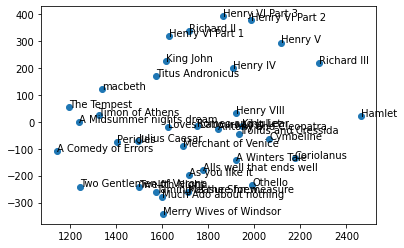

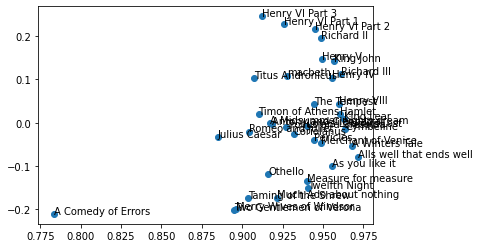

In [ ]:
# Your visualization should look similar to this:

**Tasks 14 & 15:**
14. Create a word-word matrix where each row (and each column) represents a word in the vocabulary (vocab.txt).
Each entry in this matrix represents the number of times a particular word (defined by the row) co-occurs with another
word (defined by the column) in a sentence (i.e., line in will_play_text.csv). Using the row word vectors, create a representation
of a play as the average of all the word vectors in the play. Use these vector representations of plays to compute
average pairwise cosine-similarity between plays that are comedies (do not include self-similarities). You can use the
grouping of plays in here.

15. Using vector representations of plays computed in task 14, compute average pairwise cosine-similarity between
plays that are histories, and between plays that are tragedies (do not include self-similarities).

Hint: 
[How to calculate a word-word-co-occurence-matrix with sklearn](https://stackoverflow.com/questions/35562789/how-do-i-calculate-a-word-word-co-occurrence-matrix-with-sklearn).

In [ ]:
# Your results should look similar to this:

play as word average  comedies 0.9996648165412652
play as word average  histories 0.999768672494177
play as word average  tragedies 0.999645773451325


**Task 16:**

16. Use gensim to learn a 100-dimensional word2vec representation of the words in the play (you can use default
parameters but with min count=1 so you can learn vector representations of all the words in your data i.e., no need to
use vocab.txt in this question). Use the learned word2vec representation to construct vector representations of plays as
the average of all the word vectors in the play. Visualize these representations to see which plays are most similar to each other.

**Hint:** From now on, since the inputs are no longer sparse, use the PCA function instead of the 'truncatedSVD' one.

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
36it [00:29,  1.21it/s]


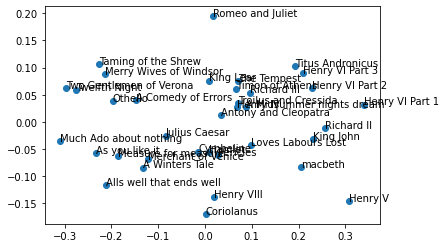

In [ ]:
# Your results should look similar to this:

**Task 17:**

17. Construct the vector representation of each character as the average
of the representations of all lines that the character spoke (with the gensim-trained representation). Visualize the characters using PCA.

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


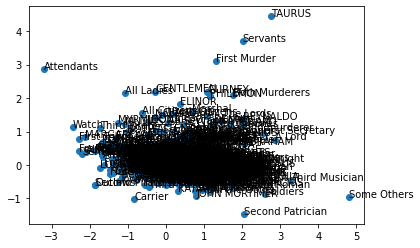

In [ ]:
# Your results should look similar to this (figure below):

**Task 18:**

18. Can you find plays that are central i.e., closest to centroid to each genre? You could do so by visualizing the play representation with PCA.

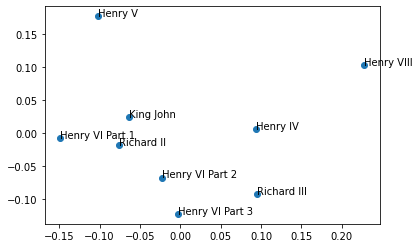

In [ ]:
# Your results should look similar to this (here's an example of genre "histories")